# Análise do conjunto de dados Titanic

### Algumas perguntas que podem ser feitas após ter o contexo do problema no site kaggle: https://www.kaggle.com/c/titanic
- Qual classe de passageiro possui maior quantidade de sobreviventes?
- Qual é a distribuição de sobreviventes, referente ao gênero, entre as várias classes?
- Qual a distribuição dos não sobreviventes, entre as classes, que possuem parentes no navio?
- Qual foi o porcentual de sobrevivência entre diferentes faixas etárias?

In [16]:
#Bibliotecas que vamos utilizar para a análise dos dados
import pandas as pd
import numpy as np
import pylab as plt

In [10]:
df = pd.read_csv("train.csv")

##### Qual classe de passageiro possui maior quantidade de sobreviventes?

In [11]:
df['Pclass'].isnull().value_counts()

False    891
Name: Pclass, dtype: int64

In [20]:
df['Survived'].isnull().value_counts()

False    891
Name: Survived, dtype: int64

In [29]:
#Passageiros que sobreviveram em cada classe
survivors = df.groupby('Pclass')['Survived'].agg(sum)
survivors

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [30]:
#Total de passageiros em cada classe
total_passengers = df.groupby('Pclass')['PassengerId'].count()
survivor_percentage = survivors / total_passengers

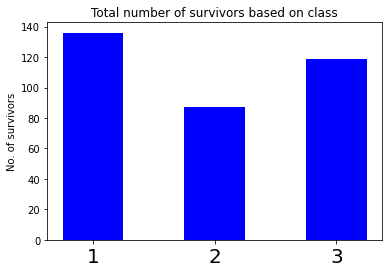

In [31]:
#Plotting the Total number of survivors
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivors.index.values.tolist(), survivors, color='blue', width=0.5)
ax.set_ylabel('No. of survivors')
ax.set_title('Total number of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

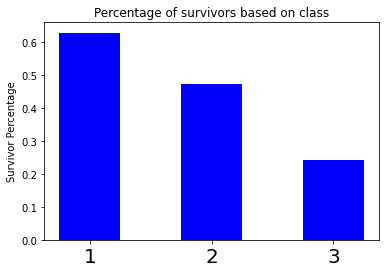

In [32]:
#Plotting the percentage of survivors in each class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivor_percentage.index.values.tolist(), survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

# Conclusões
• O número máximo de sobreviventes está na primeira e terceira classe, respectivamente

• Com relação ao número total de passageiros em cada classe, a primeira classe tem aproximadamente 60% de sobreviventes

• Com relação ao número total de passageiros em cada classe, a terceira classe tem
o número mínimo de sobreviventes em torno de 25%

# Observação:

• Havia uma preferência em salvar os passageiros das primeira classe 

### Qual é a distribuição de sobreviventes, referente ao gênero, entre as várias classes?

In [34]:
# Checking for any null values
df['Sex'].isnull().value_counts()

False    891
Name: Sex, dtype: int64

In [35]:
# Male Passengers survived in each class
male_survivors = df[df['Sex'] == 'male'].groupby('Pclass')['Survived'].agg(sum)

In [36]:
# Total Male Passengers in each class
male_total_passengers = df[df['Sex'] == 'male'].groupby('Pclass')['PassengerId'].count()
male_survivor_percentage = male_survivors / male_total_passengers

In [37]:
# Female Passengers survived in each class
female_survivors = df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].agg(sum)

In [38]:
# Total Female Passengers in each class
female_total_passengers = df[df['Sex'] == 'female'].groupby('Pclass')['PassengerId'].count()
female_survivor_percentage = female_survivors / female_total_passengers

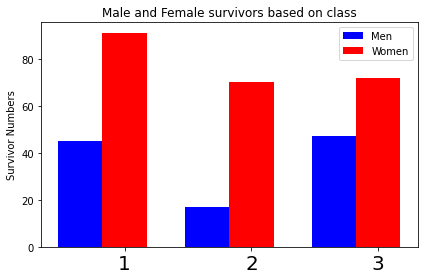

In [40]:
# Plotting the total passengers who survived based on Gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivors, bar_width, color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivors, bar_width, color='red', label='Women')
ax.set_ylabel('Survivor Numbers')
ax.set_title('Male and Female survivors based on class')
xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

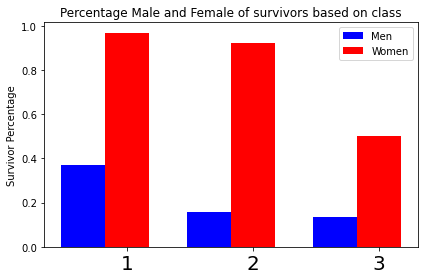

In [43]:
# Plotting the percentage of passengers who survived based on Gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivor_percentage.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivor_percentage, bar_width, color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivor_percentage, bar_width, color='red', label='Women')
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage Male and Female of survivors based on class')
xTickMarks = male_survivor_percentage.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

# Conclusões
• A maioria dos sobreviventes são do sexo feminino, independente da classe

• Mais de 90% dos passageiros do sexo feminino que estavam na primeira e na segunda classe sobreviveram

• O percentual de passageiros do sexo masculino que sobreviveram nas classes 2 e 3 são proximos

# Observação:

• Passageiros do sexo feminino tiveram preferência para que suas vidas fossem salvas

### Qual a distribuição dos não sobreviventes, entre as classes, que possuem parentes no navio?

In [45]:
# Checking for the null values
df['SibSp'].isnull().value_counts()

False    891
Name: SibSp, dtype: int64

In [46]:
# Checking for the null values
df['Parch'].isnull().value_counts()

False    891
Name: Parch, dtype: int64

In [47]:
# Total number of non-survivors in each class
non_survivors = df[(df['SibSp'] > 0) | (df['Parch'] > 0) & (df['Survived'] == 0)].groupby('Pclass')['Survived'].agg('count')

In [48]:
#Total passengers in each class
total_passengers = df.groupby('Pclass')['PassengerId'].count()
non_survivor_percentage = non_survivors / total_passengers

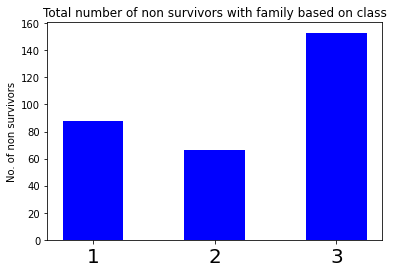

In [49]:
#Total number of non survivors with family based on class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivors.index.values.tolist(), non_survivors, color='blue', width=0.5)
ax.set_ylabel('No. of non survivors')
ax.set_title('Total number of non survivors with family based on class')
xTickMarks = non_survivors.index.values.tolist()
ax.set_xticks(non_survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

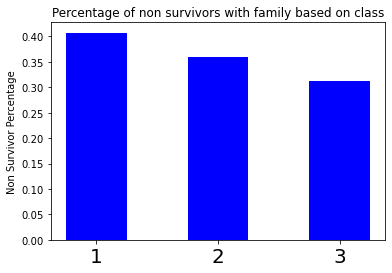

In [50]:
#Plot of percentage of non survivors with family based on class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivor_percentage.index.values.tolist(), non_survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Non Survivor Percentage')
ax.set_title('Percentage of non survivors with family based on class')
xTickMarks = non_survivor_percentage.index.values.tolist()
ax.set_xticks(non_survivor_percentage.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

# Conclusões
• Há muitos não-sobreviventes na terceira classe

• Segunda classe tem o menor número de não-sobreviventes com parentes

• Com relação ao número total de passageiros, a primeira classe, que tinha parentes a bordo, tem a porcentagem máxima não sobreviver e o terceira classe tem o mínimo

# Observação:

• Mesmo que a terceira classe tenha o maior número de não-sobreviventes com parentes a bordo, ele tinha principalmente passageiros que não tinham parentes no navio, enquanto na primeira classe, a maioria das pessoas tinha parentes a bordo o navio

### Qual foi o porcentual de sobrevivência entre diferentes faixas etárias?

In [52]:
#Checking for null values
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [53]:
#Defining the age binning interval
age_bin = [0, 18, 25, 40, 60, 100]

In [54]:
#Creating the bins
df['AgeBin'] = pd.cut(df.Age, bins=age_bin)

In [55]:
#Removing the null rows
d_temp = df[np.isfinite(df['Age'])] # removing all na instances

In [56]:
#Number of survivors based on Age bin
survivors = d_temp.groupby('AgeBin')['Survived'].agg(sum)

In [57]:
#Total passengers in each bin
total_passengers = d_temp.groupby('AgeBin')['Survived'].agg('count')

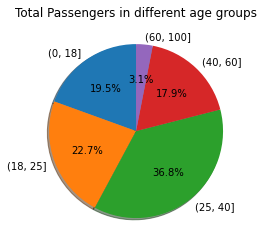

In [58]:
#Plotting the pie chart of total passengers in each bin
plt.pie(total_passengers, labels=total_passengers.index.values.tolist(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Total Passengers in different age groups')
plt.show()

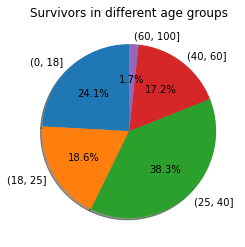

In [59]:
#Plotting the pie chart of percentage passengers in each bin
plt.pie(survivors, labels=survivors.index.values.tolist(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Survivors in different age groups')
plt.show()

# Conclusões
• A faixa etária de 25 a 40 anos tem o número máximo de passageiros, e 18 a 25 tem o segundo maior número de passageiros

• Entre as pessoas que sobreviveram, a faixa etária de 0 a 18 anos é a segunda maior número de sobreviventes

• A faixa etária de 60 a 100 anos tem menor proporção entre os sobreviventes

# Observação:

• A faixa etária de 25 a 40 anos teve o número máximo de sobreviventes em comparação com qualquer outra faixa etária, e as pessoas que eram velhas "não tiveram sorte o suficiente".